# Vorbereitung
Import der Pakete und der Daten, Überprüfen der Form (Spalten, Zeilen) der Datensätze

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [3]:
X_train = pd.read_csv('Xtrain_tvshows_featured.csv')
X_test = pd.read_csv('Xtest_tvshows_featured.csv')
y_train = pd.read_csv('ytrain_tvshows.csv')
y_test = pd.read_csv('ytest_tvshows.csv')
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(y_train.shape))
print("Shape of y Test: {}".format(y_test.shape))

Shape of X Train: (4294, 7)
Shape of X Test: (1074, 7)
Shape of y Train: (4294, 1)
Shape of y Test: (1074, 1)


# Decision Tree erstellen
-> Erstellen des Classifiers als Variable, die den Decision Tree repräsentiert.
-> Training des Modells mit den Trainingsdaten (fit(X_train, y_train))

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Erstellen der grafischen Darstellung (Grösse: 10 Zoll x 7 Zoll) des Decision Trees mit unterschiedlichen Farben
-> plt.show() gibt die Darstellung schliesslich aus.

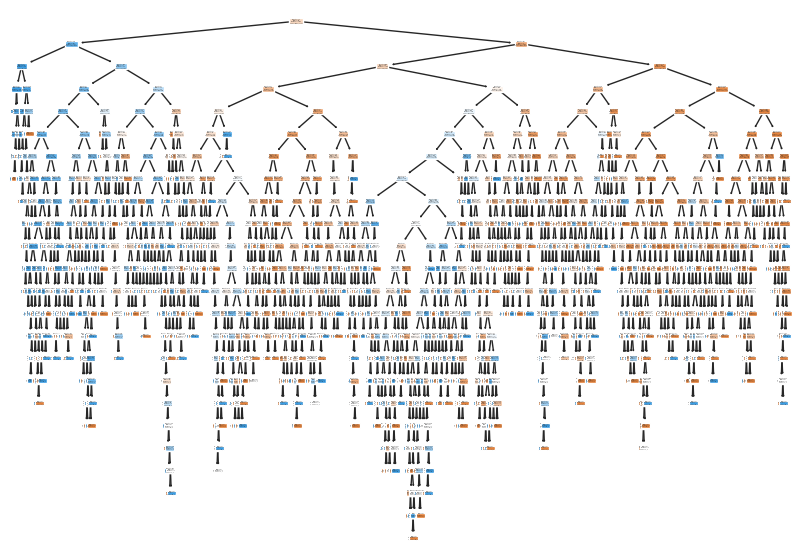

In [5]:
fig = plt.figure(figsize = (10, 7))
tree.plot_tree(clf, filled = True)
plt.show()

Hier wird das trainierte Decision Tree Modell (clf) auf den Datensatz X_train und X_test angewendet, die Ergebnisse werden in die Variablen y_pred_train respektive y_pred_test gespeichert.
-> Die Vorhersagen basieren auf den gelernten Entscheidungen des Decision Trees.

In [6]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Erstellen der Confusion Matrix
Diese bietet eine Übersicht über die Leistung des Modells durch Darstellung seiner Fehlklassifikationen pro Klasse: Verglichen werden dabei die Daten der vorhergesagten Klassen (y_pred_train) und der tatsächlichen Klassen (y_train) verglichen.

In [7]:
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[2572    1]
 [  34 1687]]


Hier wird die Confusion Matrix auch noch für die Testdaten erstellt:

In [8]:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

[[509 159]
 [120 286]]


# Auswertung: Accuracy (Genauigkeit) des Modells
Hier wird die Genauigkeit des Modells überprüft, durch Ausgabe des Accuracy Scores auf den Trainings- und Testdaten:
-> Die Genauigkeit auf den Trainingsdaten beträgt 0.99... --> 99%
-> Die Genauigkeit auf den Testdaten beträgt 0.73... --> 73%

In [9]:
print("Accuracy Score for the training set: {}".format(metrics.accuracy_score(y_train, y_pred_train)))
print("Accuracy Score for the test set: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

Accuracy Score for the training set: 0.9918490917559385
Accuracy Score for the test set: 0.7402234636871509


# Interpretation Accuracy Score:
Die hohe Genauigkeit auf den Trainigsdaten zeigt, dass das Modell die Entscheidungen basierend auf den Trainingsdaten sehr gut gelernt hat. Weil die Genauigkeit bei Anwendung auf die Testdaten jedoch nur 73% beträgt, liegt wohl ein Fall von "Overfitting" vor: Hierbei hat das Modell die gelernten Entscheidunge zu stark auf die Trainigsdaten bezogen und zu wenig generalisiert. Die schlechtere Genauigkeit auf dem Testdatensatz ist ein Hinweis darauf, dass das Modell bei neuen Daten womöglich nicht so genau ist, sondern nur für die Trainingsdaten stimmt. Dieses Ergebnis ist allerdings noch von weiteren Faktoren, wie beispielsweise der Repräsentativität des Testdatensatzes, abhängig.

# Auswertung: Recall Score
Der Recall Score (Sensitivität) gibt an, wie gut ein Modell positive Fälle korrekt erkennt. Es handelt sich dabei um das Verhältnis zwischen den korrekt vorhergesagten positiven Fälle und der tatsächlichen Anzahl an positiven Fällen. Positiv in unserem Beispiel = Wenn das Modell korrekt vorhersagt, ob eine Altersbewertung vorhanden ist.

In [14]:
print("Recall from training set: {}".format(metrics.recall_score(y_train,y_pred_train)))
print("Recall from test set: {}".format(metrics.recall_score(y_test,y_pred_test)))

Recall from training set: 0.9802440441603719
Recall from test set: 0.7044334975369458


# Interpretation: Recall Score
Auch hier zeigt sich, dass das Modell überangepasst auf den Trainingsdatensatz ist -> von Overfitting betroffen.
Dies erkennt man daran, dass die Genauigkeit bei den Trainingsdaten richtig gut ist (98%), beim Testdatensatz jedoch deutlich schlechter mit 70%

# Auswertung: Precision Score
Der Precsision Score (Präzision) gibt an, wieviele der vorhergesagten positiven Fälle tatsächlich positiv sind:

In [15]:
print("Precision score from training set: {}".format(metrics.precision_score(y_train,y_pred_train)))
print("Precision score from test set: {}".format(metrics.precision_score(y_test,y_pred_test)))

Precision score from training set: 0.9994075829383886
Precision score from test set: 0.6426966292134831


# Interpretation: Precision Score
Wie bei den vorangegangenen Scores wird auch hier ersichtlich, dass das Modell wahrscheinlich überangepasst auf den Trainingsdatensatz ist -> von Overfitting betroffen.
Dies erkennt man daran, dass die Präzision bei den Trainingsdaten richtig gut ist (99.9%), beim Testdatensatz jedoch deutlich schlechter mit 63.3%.
Zu beachten: Ein Score von 63.3% ist nicht in jedem Fall schlecht und kann in einem anderen Beispiel ausreichend sein, aber hier macht der grosse Unterschied zwischen Trainings- und Testdaten aus, dass das Modell zu genau auf die Trainingsdaten angepasst ist und der Score deshalb nicht gut ist.


# Auswertung: F1-Score
Der F1 Score misst das Gleichgewicht zwischen Recall und Precision Score – dabei bewegt sich der F1 Score zwischen 0 und 1, wobei 1 der bestmögliche Wert ist. Ein guter F1 Score bedeutet, dass das Modell sowohl präzise ist als auch einen hohen Recall aufweist.

In [16]:
print("F1 score from training set: {}".format(metrics.f1_score(y_train,y_pred_train)))
print("F1 score from test set: {}".format(metrics.f1_score(y_test,y_pred_test)))

F1 score from training set: 0.9897330595482546
F1 score from test set: 0.6721504112808461


# Interpretation: F1-Score
Der niedrigere erreichte F1 Score auf den Testdaten bestätigt die Erkenntnisse aus den vorangegangenen Tests, die auf ein beim Decision Tree Modell vorliegendes Overfitting hinweisen.

# Auswertung: AUC Score
Der AUC Score beschreibt die Fähigkeit des Modells, zwischen zwei Klassen zu unterscheiden. Ein AUC Score von 1.0 sagt aus, dass das Modell eine perfekte Trennung zwischen zwei Klassen hinkriegt, ein AUC Score von 0.5 sagt aus, dass das Modell gar keine Unterscheidungsfähigkeit hat und das Ergebnis dem Zufall entspricht.



In [17]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
print("AUC score for the training set: {}".format(metrics.auc(fpr, tpr)))

AUC score for the training set: 0.9899276963903297


In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test)
print("AUC score for the test set: {}".format(metrics.auc(fpr,tpr)))

AUC score for the test set: 0.7332047727205686


# Interpretation: AUC Score
-> Der AUC Score auf den Trainingsdaten lautet 0.98, was einer Treffsicherheit von 98% entspricht.
-> Auf den Testdaten ist auch der AUC Score deutlich niedriger, er beträgt 72%: Erneut sehen wir, dass das Modell etwas zu passgenau auf die Trainingsdaten basiert und für neue Daten ungenauer ist.

# Variable Importance
Hier berechnen wir die Wichtigkeit der einzelnen Variablen fürs Decision Tree Modell, die anschliessend sortiert in einer Tabelle bestehend aus den Variablen und ihrer jeweiligen Wichtigkeit ausgegeben werden:

In [19]:
feat_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
sorted_idx = np.argsort(feat_imp)
feat_imp_df = pd.DataFrame({'vars': X_train.columns[sorted_idx], 'feat_imp': clf.feature_importances_})
feat_imp_df.head()

,vars,feat_imp
0,Disney+,0.158586
1,Prime Video,0.201275
2,Hulu,0.565026
3,Netflix,0.021821
4,Rotten_Tomatoes,0.021316


Ausgabe der Form der ausgegebenen Tabelle:
-> Es gibt 2 Spalten und 7 Zeilen

In [20]:
feat_imp_df.shape

(7, 2)

# Darstellung der Merkmalswichtigkeiten für das Decision Tree Modell als Balkendiagramm:
Nachfolgend werden die oben ermittelten Wichtigkeiten der einzelnen Variablen für das Decision Tree Modell visuell als Balkendiagramm dargestellt.

In [22]:
fig = px.bar(feat_imp_df, x= 'feat_imp', y='vars')
fig.update_yaxes(title_text='Variables')
fig.update_xaxes(title_text='Feature Importance')
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()

In [17]:
fig = px.bar(feat_imp_df.iloc[:10,], x= 'feat_imp', y='vars')
fig.update_yaxes(title_text='Variables')
fig.update_xaxes(title_text='Feature Importance')
fig.update_layout(yaxis = {'categoryorder':'total ascending'})
fig.show()